In [51]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Load data set

train = pd.read_csv('aug_train.csv')
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
# Checking for null values

print(train.isnull().sum())
train.shape

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


(19158, 14)

In [5]:
train.info()  # Having a look at the data type in the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
enrollee_id               19158 non-null int64
city                      19158 non-null object
city_development_index    19158 non-null float64
gender                    14650 non-null object
relevent_experience       19158 non-null object
enrolled_university       18772 non-null object
education_level           18698 non-null object
major_discipline          16345 non-null object
experience                19093 non-null object
company_size              13220 non-null object
company_type              13018 non-null object
last_new_job              18735 non-null object
training_hours            19158 non-null int64
target                    19158 non-null float64
dtypes: float64(2), int64(2), object(10)
memory usage: 2.0+ MB


In [8]:
# Replacing values like <, > present in the data

train['experience'] = train['experience'].str.replace('<','')
train['last_new_job'] = train['last_new_job'].str.replace('<','')
train['company_size'] = train['company_size'].str.replace('<','')


In [9]:
train['experience'] = train['experience'].str.replace('>','')
train['last_new_job'] = train['last_new_job'].str.replace('>','')

In [12]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,50-99,Funded Startup,4,8,0.0


### EDA on the data and try to get some insights

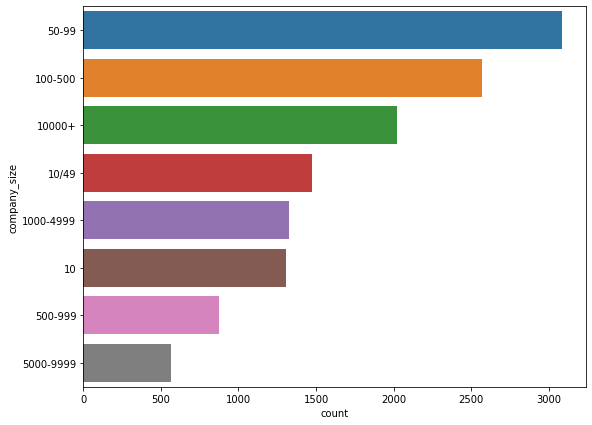

In [13]:
plt.figure(figsize=(9,7))
sns.countplot(y='company_size',data=train,order =train.company_size.value_counts().index )

plt.show()

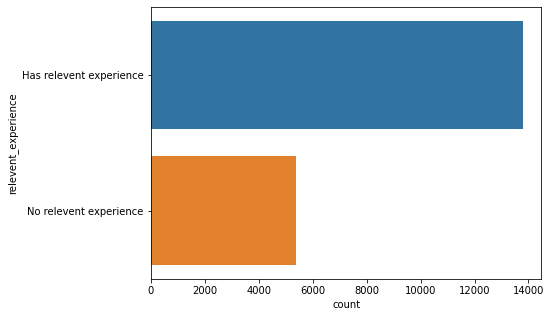

In [14]:
plt.figure(figsize=(7,5))
sns.countplot(y='relevent_experience',data=train,order =train.relevent_experience.value_counts().index)
plt.show()

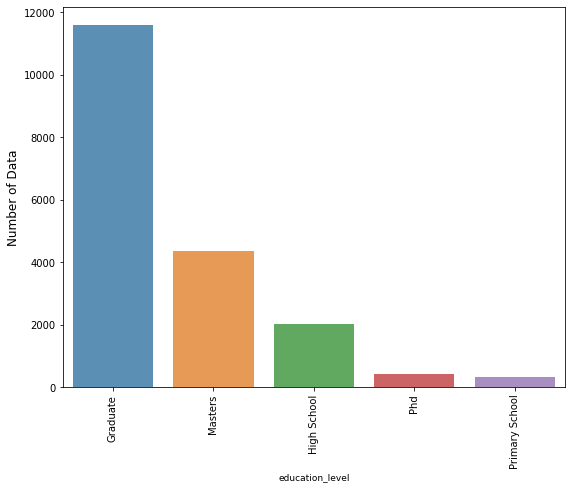

In [15]:
EL = train['education_level'].value_counts()  
plt.figure(figsize=(9,7))
sns.barplot(EL.index, EL.values, alpha=0.8)
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('education_level', fontsize=9)
plt.xticks(rotation=90)
plt.show()

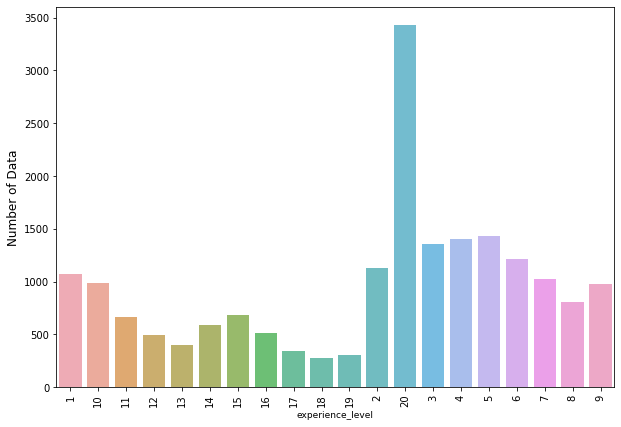

In [16]:

Experience_level = train['experience'].value_counts()  
plt.figure(figsize=(10,7))
sns.barplot(Experience_level.index, Experience_level.values, alpha=0.8)
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('experience_level', fontsize=9)
plt.xticks(rotation=90)
plt.show()

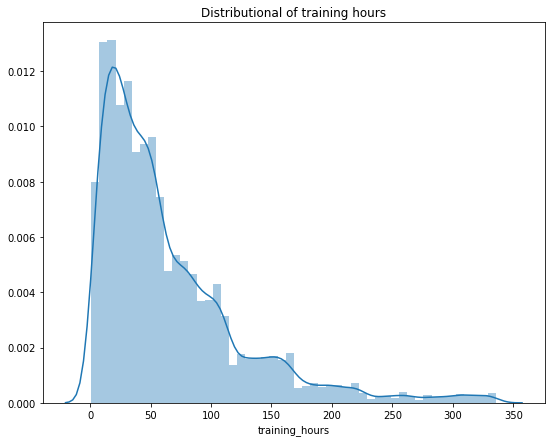

In [17]:
plt.figure(figsize=(9,7))
sns.distplot(train["training_hours"])
plt.title("Distributional of training hours")
plt.show()

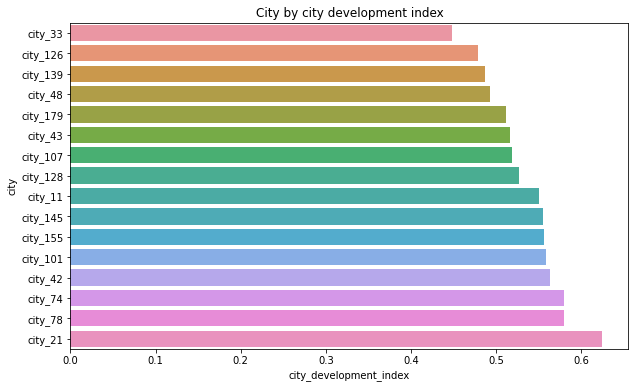

In [18]:
city_dev_index = train.sort_values(by='city_development_index', ascending=True)[:2000]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=city_dev_index.city, x=city_dev_index.city_development_index)
plt.xticks()
plt.xlabel('city_development_index')
plt.ylabel('city')
plt.title('City by city development index')
plt.show()

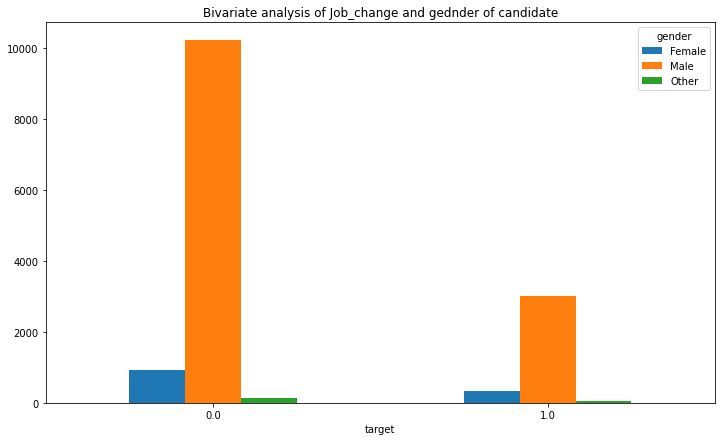

In [20]:
# Bivariate data analysis

pd.crosstab(train['target'], train['gender']).plot(kind='bar',figsize=(12,7),rot=0)
plt.title('Bivariate analysis of Job_change and gednder of candidate')
plt.show()

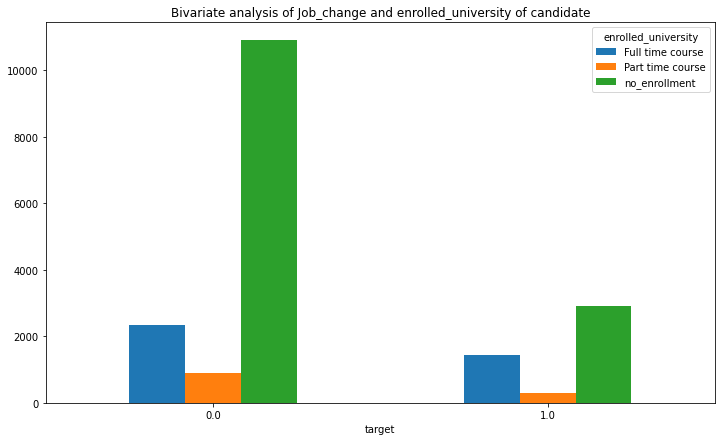

In [21]:
pd.crosstab(train['target'], train['enrolled_university']).plot(kind='bar',figsize=(12,7),rot=0)
plt.title('Bivariate analysis of Job_change and enrolled_university of candidate')
plt.show()

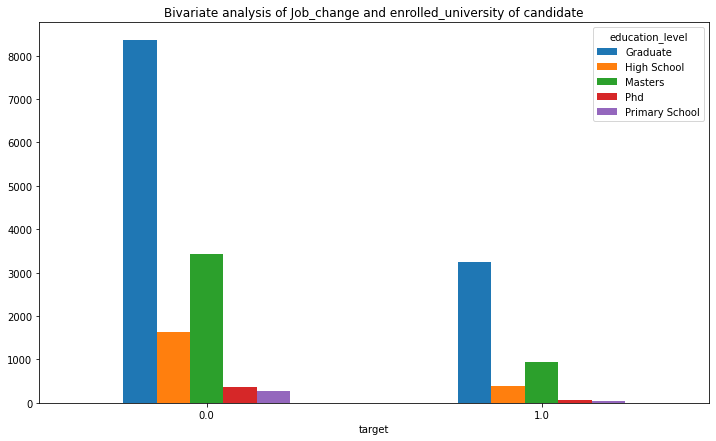

In [22]:
pd.crosstab(train['target'], train['education_level']).plot(kind='bar',figsize=(12,7),rot=0)
plt.title('Bivariate analysis of Job_change and enrolled_university of candidate')
plt.show()

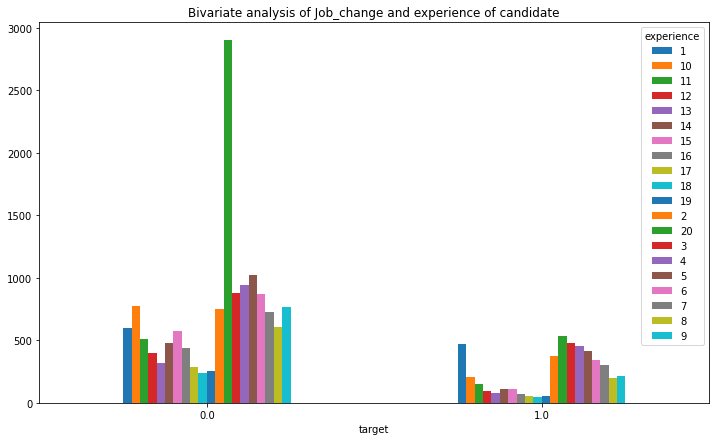

In [23]:
pd.crosstab(train['target'], train['experience']).plot(kind='bar',figsize=(12,7),rot=0)
plt.title('Bivariate analysis of Job_change and experience of candidate')
plt.show()

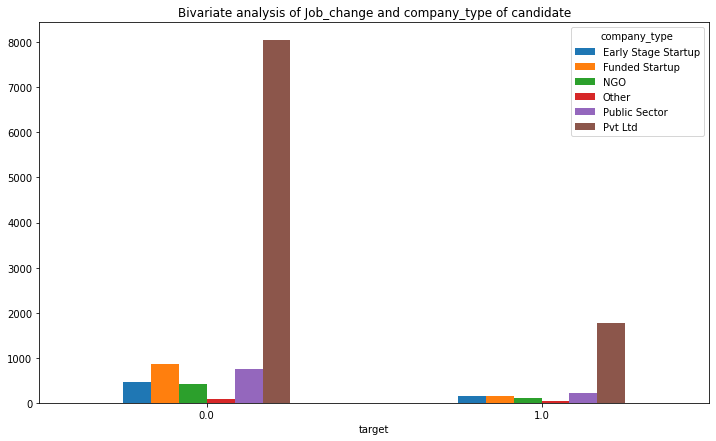

In [24]:
pd.crosstab(train['target'], train['company_type']).plot(kind='bar',figsize=(12,7),rot=0)
plt.title('Bivariate analysis of Job_change and company_type of candidate')
plt.show()

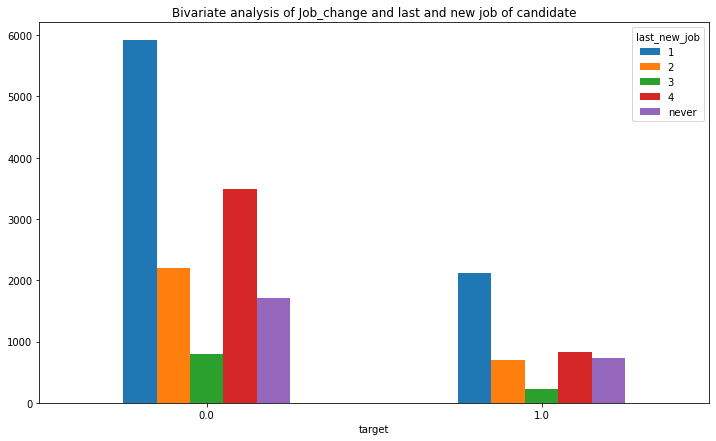

In [26]:
pd.crosstab(train['target'], train['last_new_job']).plot(kind='bar',figsize=(12,7),rot=0)
plt.title('Bivariate analysis of Job_change and last and new job of candidate')
plt.show()

### Imputing Null values in the data

In [27]:
train_cols= ['gender','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']

In [28]:
for i in train_cols:
    print(train[i].value_counts())
    print("**************")
    print("**************")

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64
**************
**************
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64
**************
**************
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64
**************
**************
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64
**************
**************
20    3434
5     1430
4     1403
3     1354
6     1216
2     1127
1     1071
7     1028
10     985
9      980
8      802
15     686
11     664
14     586
16     508
12     494
13     399
17     342
19     304
18     280
Name: experience, dtype: int64
**************
**************
50-99        3083
100-500      2571
10000+       2019
10/49    

In [29]:
train['gender'] = train['gender'].fillna('Other')
train['enrolled_university'] = train['enrolled_university'].fillna((train['enrolled_university'].mode()[0]))
train['education_level'] = train['education_level'].fillna((train['education_level'].mode()[0]))
train['major_discipline'] = train['major_discipline'].fillna((train['major_discipline'].mode()[0]))
train['company_size'] = train['company_size'].fillna((train['company_size'].mode()[0]))
train['company_type'] = train['company_type'].fillna('others')
train['education_level'] = train['education_level'].fillna((train['education_level'].mode()[0]))
train['experience'] = train['experience'].fillna((train['experience'].mode()[0]))
train['last_new_job'] = train['last_new_job'].fillna((train['last_new_job'].mode()[0]))



In [33]:
train.isnull().sum()


enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [35]:
train.gender.value_counts()

Male      13221
Other      4699
Female     1238
Name: gender, dtype: int64

In [36]:
train.target.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

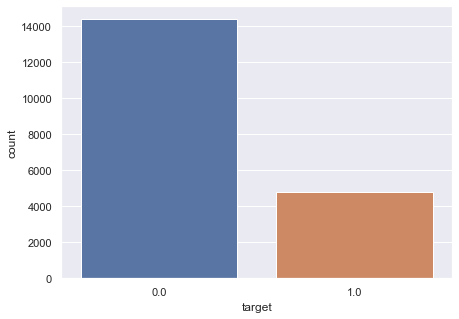

In [37]:
taget_values = train.target.value_counts()
plt.figure(figsize=[7,5])
sns.set(style='darkgrid')
sns.countplot(x='target', data=train,order = train['target'].value_counts().index)
plt.show()

### COnvering object data types into int types to train the model 

In [38]:
categorical = train.select_dtypes(include='object')


In [39]:
for i in categorical:
    train[i] = train[i].astype("category").cat.codes

<AxesSubplot:>

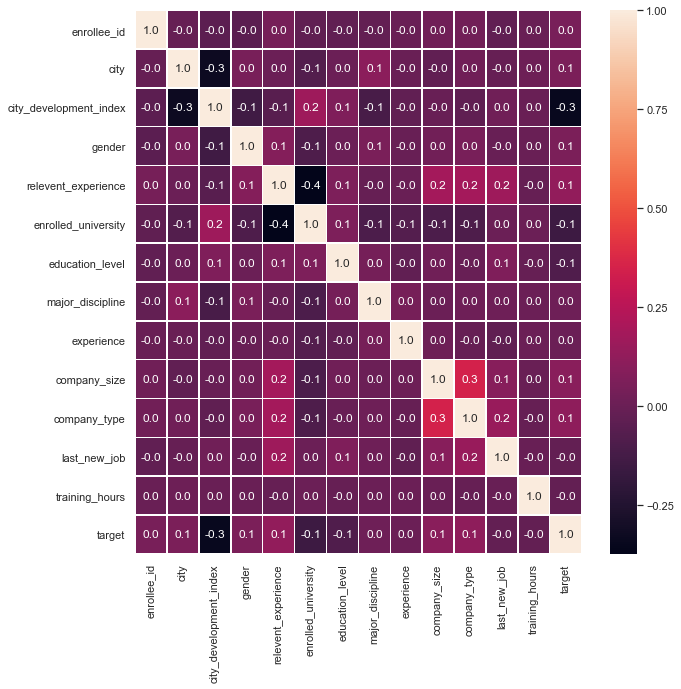

In [60]:
# Heatmap for the data to check for colinearity

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### Model building 

In [44]:
X = train.drop('target',1)
y = train['target']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20, random_state=3)

In [46]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
print(logistic_model.score(X_train,y_train))

linear_pred = logistic_model.predict(X_test)

0.751794336421767


C:\Users\Abhineet\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [48]:
logistic_rd = classification_report(y_test, linear_pred)
print("Logistic regression Classification report\n",linear_pred)


Logistic regression Classification report
 [0. 0. 0. ... 0. 0. 0.]


In [49]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=20)

rf_clf.fit(X_train, y_train)
predicted_rf = rf_clf.predict(X_test)

print("Random forest classification chart:\n",classification_report(y_test, predicted_rf))

Random forest classification chart:
               precision    recall  f1-score   support

         0.0       0.82      0.89      0.85      2852
         1.0       0.58      0.42      0.49       980

    accuracy                           0.77      3832
   macro avg       0.70      0.66      0.67      3832
weighted avg       0.76      0.77      0.76      3832



In [52]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)

ypred_dtc = dtc.predict(X_test)
print("Classification report of DecisionTree\n",classification_report(ypred_dtc, y_test))

Classification report of DecisionTree
               precision    recall  f1-score   support

         0.0       0.80      0.80      0.80      2831
         1.0       0.43      0.43      0.43      1001

    accuracy                           0.71      3832
   macro avg       0.62      0.61      0.62      3832
weighted avg       0.70      0.71      0.70      3832



In [56]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Number of trees in random forest
n_estimators = [50, 70, 100]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [3, 5, 7]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [57]:
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 7],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 70, 100]},
                   random_state=42)

In [58]:
rf_random.predict(X_test)
print("Classification report of Hyperparameter tunned Random forest\n",classification_report(ypred_dtc, y_test))

Classification report of Hyperparameter tunned Random forest
               precision    recall  f1-score   support

         0.0       0.80      0.80      0.80      2831
         1.0       0.43      0.43      0.43      1001

    accuracy                           0.71      3832
   macro avg       0.62      0.61      0.62      3832
weighted avg       0.70      0.71      0.70      3832

